## 1. Se importan las librerias

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras import backend as K
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, plot_confusion_matrix
# Agregadas
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
import cv2
from sklearn.preprocessing import LabelBinarizer
import pickle
from focal_loss import BinaryFocalLoss
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import pandas as pd

from tensorflow.keras.preprocessing import image

HEIGHT=128
WIDTH=128
DEFAULT_IMAGE_SIZE = tuple((WIDTH, HEIGHT))

In [2]:
def show_metrics(y_pred,th):
    cm = confusion_matrix(test_Y, y_pred.argmax(axis=1)>th)
    #print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Sana", "Sana"])
    disp.plot(cmap=plt.cm.Greens)
    plt.title('Matriz de confusión del clasificador')
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores Verdaderos')
    plt.show()
    d = classification_report(test_Y, y_pred.argmax(axis=1) > th,output_dict=True)
    display(pd.DataFrame.from_dict(d))
    return y_pred, d

## 2. Prueba modelo dataset aumentadas
Cargar modelo y valores del dataset original

In [3]:
model = tf.keras.models.load_model('modelo_aumentadas.h5', compile=False)

test_X = np.load("test_X_originales.npy")
test_Y = np.load("test_Y_originales.npy")
test_Y_one_hot = np.load("test_Y_one_hot_originales.npy")

2022-12-17 09:11:48.998813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2.1 Análisis de métricas de rendimiento

In [4]:
y_pred = model.predict(test_X)
y_pred.shape
test_Y_one_hot.shape
y_pred[0,:].sum()

1/1 [==============================] - 0s 285ms/step


1.0

## 2.2 Crear matriz de confusión

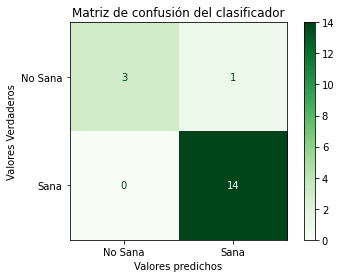

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.933333,0.944444,0.966667,0.948148
recall,0.750000,1.000000,0.944444,0.875000,0.944444
f1-score,0.857143,0.965517,0.944444,0.911330,0.941434
support,4.000000,14.000000,0.944444,18.000000,18.000000


In [16]:
a, mi_dicc = show_metrics(y_pred,.5)

#Crear tabla para latex

#print(pd.DataFrame(mi_dicc).to_latex(index=False))

## 2.3 Probar el modelo con una Hoja

In [6]:
#imgpath='Fotos/sana/augmented_49_622492.jpeg'
img=image.load_img("FotosCombinadas/Sana/augmented_35_3786006.jpeg",target_size=DEFAULT_IMAGE_SIZE)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model.predict(images,batch_size=16)
print(pred)
if pred[0][0]>0.5:
    category="No Sana"
elif pred[0][1]>0.5:
    category="Sana"
    
print(category)

1/1 [==============================] - 0s 22ms/step
[[0. 1.]]
Sana


## 3. Prueba modelo dataset combinadas
Cargar modelo y valores del dataset original

In [7]:
model = tf.keras.models.load_model('modelo_combinadas.h5', compile=False)

test_X = np.load("test_X_originales.npy")
test_Y = np.load("test_Y_originales.npy")
test_Y_one_hot = np.load("test_Y_one_hot_originales.npy")

## 3.1 Análisis de métricas de rendimiento

In [8]:
y_pred = model.predict(test_X)
y_pred.shape
test_Y_one_hot.shape
y_pred[0,:].sum()

1/1 [==============================] - 0s 131ms/step


0.99999994

## 3.2 Crear matriz de confusión

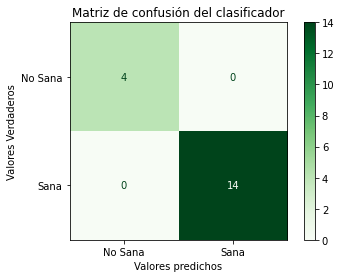

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,4.0,14.0,1.0,18.0,18.0


In [9]:
a, mi_dicc = show_metrics(y_pred,.5)

#Crear tabla para latex

#print(pd.DataFrame(mi_dicc).to_latex(index=False))

## 3.3 Probar el modelo con una Hoja

In [10]:
#imgpath='Fotos/sana/augmented_49_622492.jpeg'
img=image.load_img("FotosCombinadas/Sana/augmented_35_3786006.jpeg",target_size=DEFAULT_IMAGE_SIZE)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model.predict(images,batch_size=16)
print(pred)
if pred[0][0]>0.5:
    category="No Sana"
elif pred[0][1]>0.5:
    category="Sana"
    
print(category)

1/1 [==============================] - 0s 35ms/step
[[0. 1.]]
Sana


## 4. Prueba modelo dataset originales

In [11]:
model = tf.keras.models.load_model('modelo_originales.h5', compile=False)

test_X = np.load("test_X_originales.npy")
test_Y = np.load("test_Y_originales.npy")
test_Y_one_hot = np.load("test_Y_one_hot_originales.npy")

## 4.1 Análisis de métricas de rendimiento

In [12]:
y_pred = model.predict(test_X)
y_pred.shape
test_Y_one_hot.shape
y_pred[0,:].sum()

1/1 [==============================] - 0s 161ms/step


1.0

## 4.2 Crear matriz de confusión

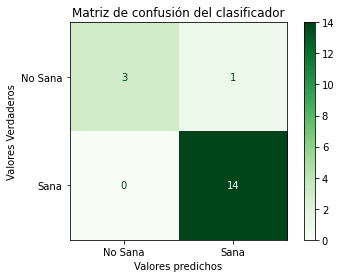

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.933333,0.944444,0.966667,0.948148
recall,0.750000,1.000000,0.944444,0.875000,0.944444
f1-score,0.857143,0.965517,0.944444,0.911330,0.941434
support,4.000000,14.000000,0.944444,18.000000,18.000000


In [13]:
a, mi_dicc = show_metrics(y_pred,.5)

#Crear tabla para latex

#print(pd.DataFrame(mi_dicc).to_latex(index=False))

## 4.3 Crear matriz de confusión

In [14]:
#imgpath='Fotos/sana/augmented_49_622492.jpeg'
img=image.load_img("FotosCombinadas/Sana/augmented_35_3786006.jpeg",target_size=DEFAULT_IMAGE_SIZE)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model.predict(images,batch_size=16)
print(pred)
if pred[0][0]>0.5:
    category="No Sana"
elif pred[0][1]>0.5:
    category="Sana"
    
print(category)

1/1 [==============================] - 0s 29ms/step
[[1. 0.]]
No Sana
